# **📚 과제: 딥러닝으로 피마 인디언의 당뇨병 여부 예측하기**

&emsp;&emsp;&emsp;미국 남서부에 거주하는 피마 인디언 부족은 현대적인 생활습관으로 인해 당뇨병 환자의 비율이 매우 높습니다.  
&emsp;&emsp;&emsp;당신은 데이터 과학자로서 이 부족의 건강 관리 시스템을 돕기 위해 딥러닝 기반의 당뇨병 예측 모델을 만들어야 합니다.

---

## 🎯 목표
&emsp;&emsp;&emsp;: 피마 인디언 부족 구성원들이 당뇨병 위험군인지(이진 분류)를 예측하는 딥러닝 모델을 구축하고, 모델의 성능을 평가합니다.

---

## 📁 데이터셋
- **데이터셋** : 피마 인디언 당뇨병 데이터셋 (`pima-indians-diabetes3.csv`)
- **데이터 특성** :
  - 데이터 샘플 수 : **768개**
  - 속성(특징) 수 : **8개**
  - 클래스(레이블) : **당뇨병 여부** (`0`: 당뇨병 아님, `1`: 당뇨병)

---

## ✅ 과제 조건
&emsp;다음 조건에 맞추어 과제를 수행하세요.

- **구글 코랩 환경**을 사용하여 수행할 것.
- 데이터셋은 깃허브에서 제공된 데이터를 직접 다운로드하여 사용할 것.
- 모델은 **Sequential 모델**로 설계하며, 반드시 **3개의 층 (입력층 포함)**으로 구성할 것.
- 모델 컴파일 시 **epochs는 200**으로 설정하여 학습할 것.
- 각 층은 다음 조건을 만족해야 함:
  - 입력층 겸 첫 번째 은닉층: 활성화 함수는 **`relu`**로 설정
  - 두 번째 은닉층: 활성화 함수는 **`relu`**로 설정
  - 출력층: 활성화 함수는 **`sigmoid`**로 설정
- 모델 성능 평가는 **정확도(accuracy)**를 사용하며, **5겹(k=5) 교차 검증(K-Fold Cross Validation)**을 적용하여 평균 정확도를 구할 것.
- 최종 학습된 모델을 파일로 저장한 후, 다시 불러와서 정확도(accuracy)를 출력하여 모델이 정상적으로 저장 및 로드되었는지 확인할 것.


---

## 💻 코드 작성 시 참고 사항
과제 수행 시 다음 라이브러리를 필수로 사용하며, 추가 라이브러리를 사용할 수 있습니다.

```python
from tensorflow.keras.models import Sequential      # 딥러닝 모델 생성 및 저장(load_model도 활용)
from tensorflow.keras.layers import Dense           # 모델의 층을 구성(입력층, 은닉층, 출력층)

from sklearn.model_selection import KFold           # K겹 교차 검증 수행
from sklearn.metrics import accuracy_score          # 모델 정확도 평가

import pandas as pd                                 # 데이터셋 로드 및 전처리
```

+) 추가로 데이터를 불러오기 위해, 다음의 코드를 활용하길 바랍니다.
```python
# 피마 인디언 당뇨병 데이터셋을 불러옵니다.
df = pd.read_csv('./data/pima-indians-diabetes3.csv')
```

In [ ]:
# 깃허브에 준비된 데이터를 가져옵니다. (1회 클론 이후 주석 처리 추천)
!git clone https://github.com/taehojo/data.git

Cloning into 'data'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 36 (delta 9), reused 26 (delta 4), pack-reused 0 (from 0)
Receiving objects: 100% (36/36), 483.12 KiB | 5.75 MiB/s, done.
Resolving deltas: 100% (9/9), done.


In [41]:
# 필요한 라이브러리 임포트 및 데이터 다운로드

from tensorflow.keras.models import Sequential, load_model     # 딥러닝 모델 생성 및 저장(load_model도 활용)
from tensorflow.keras.layers import Dense           # 모델의 층을 구성(입력층, 은닉층, 출력층)

from sklearn.model_selection import KFold           # K겹 교차 검증 수행
from sklearn.metrics import accuracy_score          # 모델 정확도 평가

import pandas as pd                                 # 데이터셋 로드 및 전처리
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# 피마 인디언 당뇨병 데이터셋을 불러옵니다.
df = pd.read_csv('./data/pima-indians-diabetes3.csv')

In [ ]:
display(df)

pregnant  plasma  pressure  thickness  insulin   bmi  pedigree  age  \
0           6     148        72         35        0  33.6     0.627   50   
1           1      85        66         29        0  26.6     0.351   31   
2           8     183        64          0        0  23.3     0.672   32   
3           1      89        66         23       94  28.1     0.167   21   
4           0     137        40         35      168  43.1     2.288   33   
..        ...     ...       ...        ...      ...   ...       ...  ...   
763        10     101        76         48      180  32.9     0.171   63   
764         2     122        70         27        0  36.8     0.340   27   
765         5     121        72         23      112  26.2     0.245   30   
766         1     126        60          0        0  30.1     0.349   47   
767         1      93        70         31        0  30.4     0.315   23   

     diabetes  
0           1  
1           0  
2           1  
3           0  
4           1  
..        ...  
763         0  
764         0  
765         0  
766         1  
767         0  

[768 rows x 9 columns]

In [ ]:
# 데이터 형태 확인(display() 함수 추천, 클래스 종류별 개수, 정보별 특징, 상관관계, 히트맵)

#칼럼 확인
df.columns

#클래스 종류별 개수
df["pregnant"].value_counts()
df["plasma"].value_counts()
df["pressure"].value_counts()
df["thickness"].value_counts()
df["insulin"].value_counts()
df["bmi"].value_counts()
df["pedigree"].value_counts()
df["age"].value_counts()
df["diabetes"].value_counts()


diabetes
0    500
1    268
Name: count, dtype: int64

In [ ]:
#정보별 특징
df.describe()

pregnant      plasma    pressure   thickness     insulin         bmi  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

         pedigree         age    diabetes  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%      0.372500   29.000000    0.000000  
75%      0.626250   41.000000    1.000000  
max      2.420000   81.000000    1.000000

In [ ]:
#상관 관계
df.corr()

pregnant    plasma  pressure  thickness   insulin       bmi  \
pregnant   1.000000  0.129459  0.141282  -0.081672 -0.073535  0.017683   
plasma     0.129459  1.000000  0.152590   0.057328  0.331357  0.221071   
pressure   0.141282  0.152590  1.000000   0.207371  0.088933  0.281805   
thickness -0.081672  0.057328  0.207371   1.000000  0.436783  0.392573   
insulin   -0.073535  0.331357  0.088933   0.436783  1.000000  0.197859   
bmi        0.017683  0.221071  0.281805   0.392573  0.197859  1.000000   
pedigree  -0.033523  0.137337  0.041265   0.183928  0.185071  0.140647   
age        0.544341  0.263514  0.239528  -0.113970 -0.042163  0.036242   
diabetes   0.221898  0.466581  0.065068   0.074752  0.130548  0.292695   

           pedigree       age  diabetes  
pregnant  -0.033523  0.544341  0.221898  
plasma     0.137337  0.263514  0.466581  
pressure   0.041265  0.239528  0.065068  
thickness  0.183928 -0.113970  0.074752  
insulin    0.185071 -0.042163  0.130548  
bmi        0.140647  0.036242  0.292695  
pedigree   1.000000  0.033561  0.173844  
age        0.033561  1.000000  0.238356  
diabetes   0.173844  0.238356  1.000000

<function matplotlib.pyplot.show(close=None, block=None)>

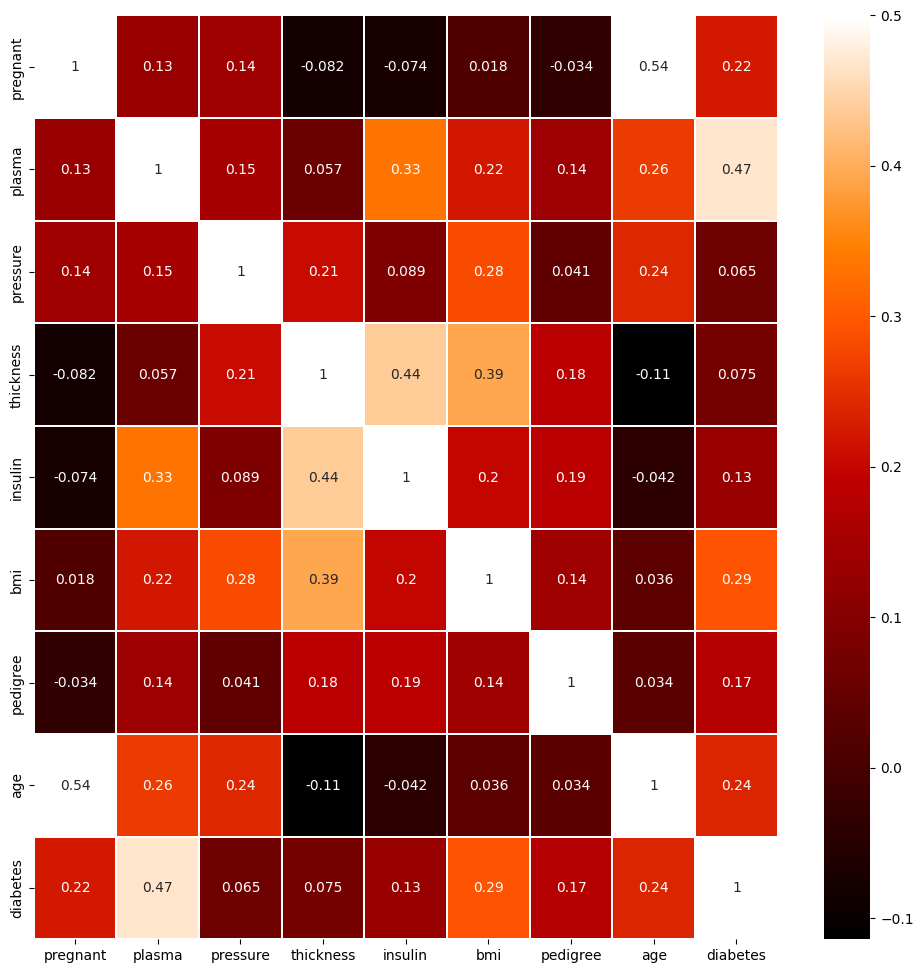

In [ ]:
#히트맵

#그래프 색상 구성 설정
colormap = plt.cm.gist_heat
plt.figure(figsize=(12,12))

sns.heatmap(df.corr(),linewidth=0.1,vmax=0.5,cmap=colormap,linecolor='white',annot=True)
plt.show

In [ ]:
# 입력 데이터(X)와 결과 데이터(y) 분리
x=df.iloc[:,0:8]
y=df.iloc[:,8]

In [32]:
# 딥러닝 모델 설정 (Sequential 모델, 3개 층 사용)
def model_fn():
  model = Sequential()
  model.add(Dense(12, input_dim=8, activation='relu', name='Dense_1'))
  model.add(Dense(8, activation='relu',name='Dense_2'))
  model.add(Dense(1, activation='sigmoid',name='Dense_3'))
  return model

In [33]:
# 모델 컴파일 및 학습 진행 (5겹 교차 검증 수행)
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


k=5
kfold=KFold(n_splits=k,shuffle=True)
acc_score=[]

for train_index, test_index in kfold.split(x):
  X_train,X_test=x.iloc[train_index,:],x.iloc[test_index,:]
  y_train,y_test=y.iloc[train_index],y.iloc[test_index]

  model = model_fn()
  model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


  history=model.fit(X_train,y_train,epochs=200,batch_size=5)
  loss,accuracy=model.evaluate(X_test,y_test)
  acc_score.append(accuracy)


Epoch 1/200


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


123/123 ━━━━━━━━━━━━━━━━━━━━ 27s 2ms/step - accuracy: 0.5958 - loss: 3.8786
Epoch 2/200
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5696 - loss: 1.0862
Epoch 3/200
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6055 - loss: 0.8318
Epoch 4/200
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6180 - loss: 0.7446
Epoch 5/200
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5939 - loss: 0.7174
Epoch 6/200
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6353 - loss: 0.6765
Epoch 7/200
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6226 - loss: 0.6531
Epoch 8/200
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6498 - loss: 0.6432
Epoch 9/200
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6397 - loss: 0.6430
Epoch 10/200
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6367 - loss: 0.6691
Epoch 11/200
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6645 - loss: 0.6306
Epoch 12/200
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/ste

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3436 - loss: 18.2916
Epoch 2/200
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5722 - loss: 0.9278
Epoch 3/200
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6777 - loss: 0.7068
Epoch 4/200
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6833 - loss: 0.6892
Epoch 5/200
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6386 - loss: 0.6923
Epoch 6/200
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7181 - loss: 0.6220
Epoch 7/200
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6866 - loss: 0.6181
Epoch 8/200
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6997 - loss: 0.6121
Epoch 9/200
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6817 - loss: 0.6117
Epoch 10/200
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6606 - loss: 0.6207
Epoch 11/200
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7215 - loss: 0.5977
Epoch 12/200
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/ste

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5700 - loss: 11.0759
Epoch 2/200
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4349 - loss: 2.7153
Epoch 3/200
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4673 - loss: 1.9573
Epoch 4/200
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5326 - loss: 1.2642
Epoch 5/200
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5172 - loss: 1.0791
Epoch 6/200
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5690 - loss: 0.8750
Epoch 7/200
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6181 - loss: 0.8285
Epoch 8/200
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6261 - loss: 0.7910
Epoch 9/200
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6891 - loss: 0.7270
Epoch 10/200
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6173 - loss: 0.8061
Epoch 11/200
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6299 - loss: 0.7489
Epoch 12/200
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/ste

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5477 - loss: 1.8844
Epoch 2/200
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6176 - loss: 1.0305
Epoch 3/200
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6175 - loss: 0.8011
Epoch 4/200
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5866 - loss: 0.8454
Epoch 5/200
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6128 - loss: 0.7203
Epoch 6/200
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6867 - loss: 0.6680
Epoch 7/200
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6617 - loss: 0.6295
Epoch 8/200
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6567 - loss: 0.6657
Epoch 9/200
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6842 - loss: 0.6777
Epoch 10/200
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6589 - loss: 0.6269
Epoch 11/200
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6552 - loss: 0.6637
Epoch 12/200
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6672 - loss: 15.6727
Epoch 2/200
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5787 - loss: 1.0477
Epoch 3/200
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6475 - loss: 0.7680
Epoch 4/200
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6940 - loss: 0.6398
Epoch 5/200
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7198 - loss: 0.6263
Epoch 6/200
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7153 - loss: 0.6585
Epoch 7/200
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6876 - loss: 0.6157
Epoch 8/200
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6863 - loss: 0.6107
Epoch 9/200
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7029 - loss: 0.6490
Epoch 10/200
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6395 - loss: 0.6720
Epoch 11/200
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6839 - loss: 0.6067
Epoch 12/200
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/ste

In [35]:
# 모델의 평균 정확도 출력

avg_acc_score=sum(acc_score)/k
avg_acc_score

0.7551990509033203

In [37]:
# 최종 모델 저장 및 불러오기 (+불러온 모델의 정확도 재확인)
model.save('./data/model/Indian.keras')

In [38]:
del model

In [42]:
model=load_model('./data/model/Indian.keras')

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 8 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [43]:
score=model.evaluate(x,y)
score[1]

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7570 - loss: 0.5266  


0.7682291865348816